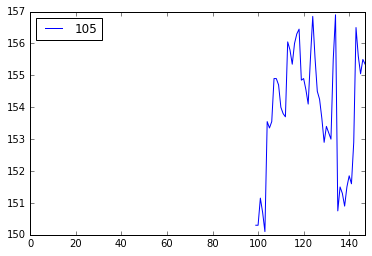

In [19]:
%matplotlib inline
import pandas as pd
from subprocess import call

ret = call(["./fetch_game_reward.sh"])
if ret != 0:
    print("Problem ", ret)
else:    
    rewards = pd.read_csv('rewards.txt')
    pd.rolling_mean(rewards, 100).plot()

In [20]:
ret = call(["./fetch_weights.sh"])
if ret != 0:
    print("Problem ", ret)